# Forecasting Using Time Series Analysis
                             ##Final Project##

In [40]:
# Importing Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#loading dataset into jupyter notebook

url = "https://raw.githubusercontent.com/FuTSA23/time-series-analysis-datasets/main/Complete_Blasting_info%20(1).csv"
data = pd.read_csv(url)
data


,Unnamed: 0,PM10 (µg/m3),Time,Date,NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
0,0,95.0,00:00:00,2023-02-01,14.484070,35.0,90.1,56.2,0.310000,11.986833,17.7,28.1,0.4
1,1,95.0,00:15:00,2023-02-01,14.484070,35.0,88.0,55.1,0.330000,11.986833,18.3,27.1,0.4
2,2,95.0,00:30:00,2023-02-01,15.835914,35.0,87.7,55.2,0.380000,10.912796,19.7,24.9,0.4
3,3,122.0,00:45:00,2023-02-01,15.914518,34.0,88.9,55.7,0.380000,10.613291,21.3,21.9,0.4
4,4,122.0,01:00:00,2023-02-01,16.035640,34.0,90.0,55.8,0.380000,7.362361,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,8635,19.0,22:45:00,2023-05-01,17.900000,11.0,100.0,67.8,0.630000,10.000000,10.7,26.1,0.1
8636,8636,19.0,23:00:00,2023-05-01,17.900000,11.0,100.0,67.7,0.570000,10.000000,10.4,30.9,0.1
8637,8637,19.0,23:15:00,2023-05-01,19.600000,11.0,100.2,69.2,0.580000,9.900000,10.5,29.6,0.1
8638,8638,19.0,23:30:00,2023-05-01,20.800000,11.0,100.2,70.2,0.580000,9.500000,10.8,30.0,0.1


In [2]:
#getting data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       8640 non-null   int64  
 1   PM10 (µg/m3)     8640 non-null   float64
 2   Time             8640 non-null   object 
 3   Date             8640 non-null   object 
 4   NO (µg/m3)       8640 non-null   float64
 5   PM2.5 (µg/m3)    8640 non-null   float64
 6   NO2 (µg/m3)      8640 non-null   float64
 7   NOX (ppb)        8640 non-null   float64
 8   CO (mg/m3)       8640 non-null   float64
 9   SO2 (µg/m3)      8640 non-null   float64
 10  NH3 (µg/m3)      8640 non-null   float64
 11  Ozone (µg/m3)    8640 non-null   float64
 12  Benzene (µg/m3)  8640 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 877.6+ KB


In [3]:
#getting all data stats
data.describe()

,Unnamed: 0,PM10 (µg/m3),NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
count,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000
mean,4319.500000,165.140621,14.269630,74.626459,56.128353,42.457154,1.392857,33.727472,13.160495,35.765681,0.177505
std,2494.297496,128.089107,17.986445,54.992383,20.328553,22.129798,0.626985,38.878154,6.095797,26.549469,0.052601
min,0.000000,-13.488183,0.100000,3.000000,0.200000,4.200000,0.100000,0.100000,4.600000,0.100000,0.100000
25%,2159.750000,79.000000,4.000000,36.000000,39.575000,25.100000,0.930000,15.000000,9.400000,11.000000,0.177505
50%,4319.500000,127.000000,6.600000,59.000000,53.800000,37.500000,1.390000,24.200000,11.000000,33.000000,0.177505
75%,6479.250000,208.000000,17.121285,100.000000,71.500000,53.300000,1.832500,36.100000,13.900000,58.125000,0.177505
max,8639.000000,847.000000,157.500000,474.000000,106.900000,165.200000,4.000000,645.600000,62.400000,123.800000,0.600000


In [4]:
data.isnull().sum()

Unnamed: 0         0
PM10 (µg/m3)       0
Time               0
Date               0
NO (µg/m3)         0
PM2.5 (µg/m3)      0
NO2 (µg/m3)        0
NOX (ppb)          0
CO (mg/m3)         0
SO2 (µg/m3)        0
NH3 (µg/m3)        0
Ozone (µg/m3)      0
Benzene (µg/m3)    0
dtype: int64

In [5]:
data_linear = data.interpolate(method='linear')
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'])

#printing datatypes of the columns of the dataset

print(data.dtypes)

Unnamed: 0                  int64
PM10 (µg/m3)              float64
Time               datetime64[ns]
Date               datetime64[ns]
NO (µg/m3)                float64
PM2.5 (µg/m3)             float64
NO2 (µg/m3)               float64
NOX (ppb)                 float64
CO (mg/m3)                float64
SO2 (µg/m3)               float64
NH3 (µg/m3)               float64
Ozone (µg/m3)             float64
Benzene (µg/m3)           float64
dtype: object


C:\Users\2477s\AppData\Local\Temp\ipykernel_19824\968992230.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


# ANALYZING DATASETS USING TIME SERIES

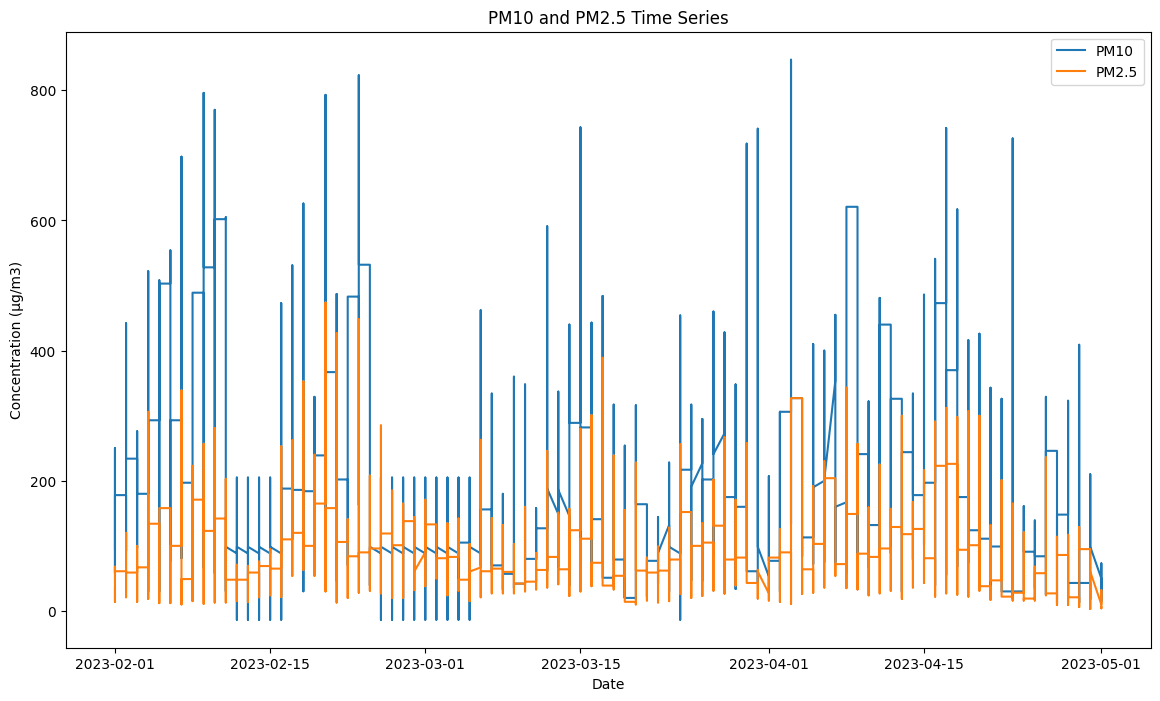

In [6]:
#Getting Time Series of PM10 and PM2.5 datasets
#getting concentration vs date graph
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['PM10 (µg/m3)'], label='PM10')
plt.plot(data['Date'], data['PM2.5 (µg/m3)'], label='PM2.5')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m3)')
plt.title('PM10 and PM2.5 Time Series')
plt.legend()
plt.show()

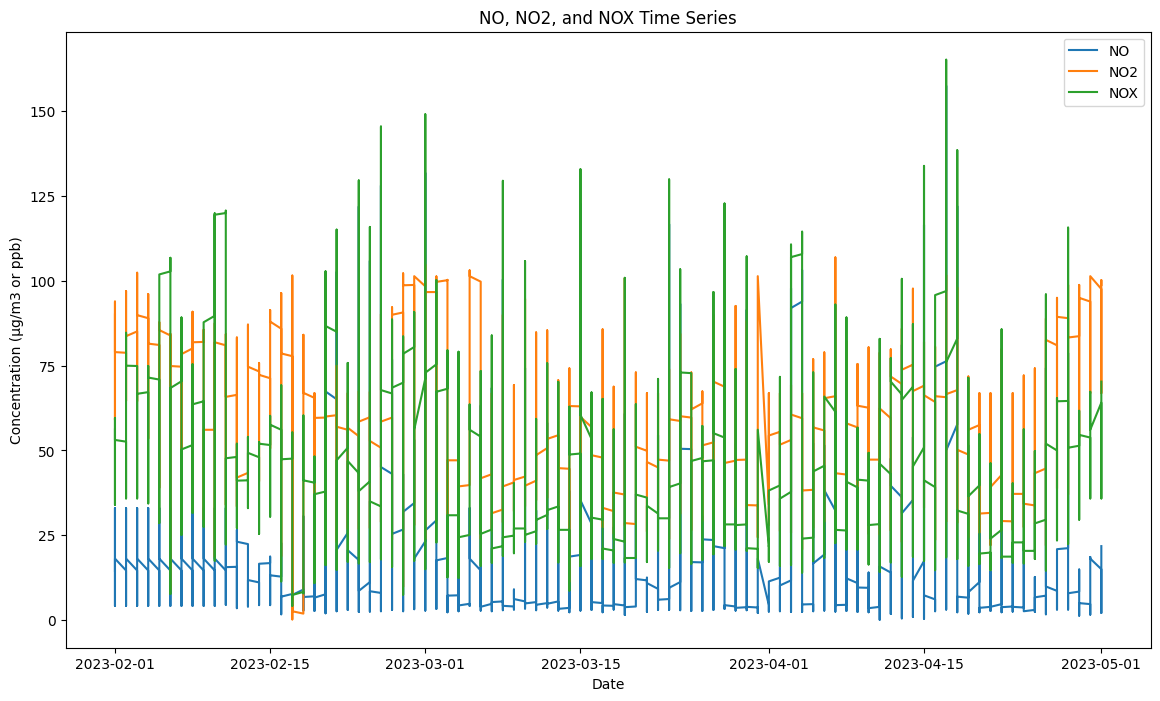

In [7]:
#Getting Time Series of NO, NO2 and NOX datasets
#getting concentration vs date graph
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['NO (µg/m3)'], label='NO')
plt.plot(data['Date'], data['NO2 (µg/m3)'], label='NO2')
plt.plot(data['Date'], data['NOX (ppb)'], label='NOX')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m3 or ppb)')
plt.title('NO, NO2, and NOX Time Series')
plt.legend()
plt.show()

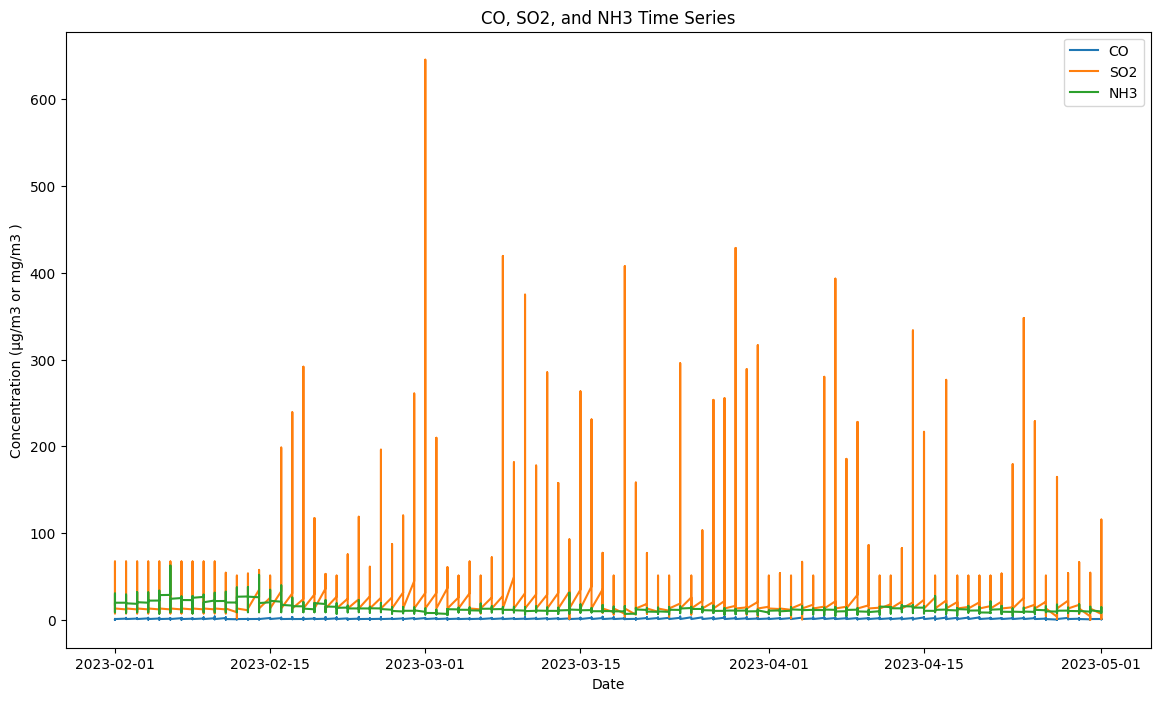

In [8]:
#Getting Time Series of CO, SO2 and NH3 datasets
#getting concentration vs date graph
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['CO (mg/m3)'], label='CO')
plt.plot(data['Date'], data['SO2 (µg/m3)'], label='SO2')
plt.plot(data['Date'], data['NH3 (µg/m3)'], label='NH3')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m3 or mg/m3 )')
plt.title('CO, SO2, and NH3 Time Series')
plt.legend()
plt.show()

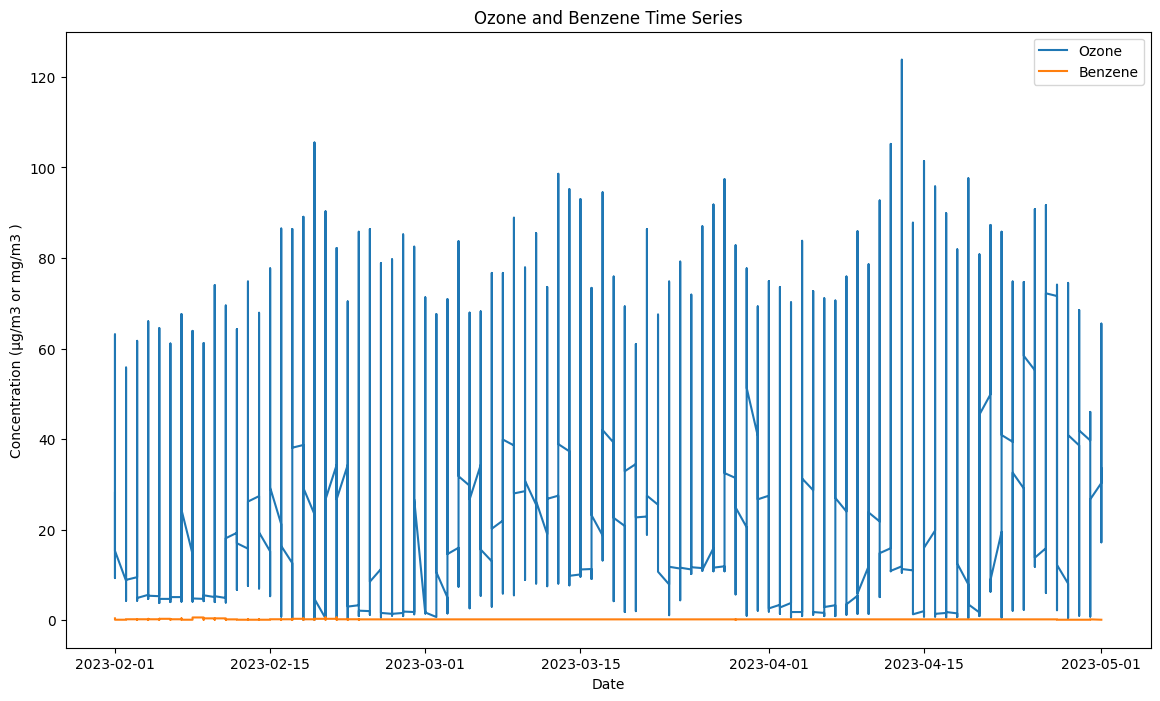

In [9]:
#Getting Time Series of Ozone and Benzene datasets
#getting concentration vs date graph
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Ozone (µg/m3)'], label='Ozone')
plt.plot(data['Date'], data['Benzene (µg/m3)'], label='Benzene')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m3 or mg/m3 )')
plt.title('Ozone and Benzene Time Series')
plt.legend()
plt.show()

# Curve Fitting of graphs by smoothing of curves

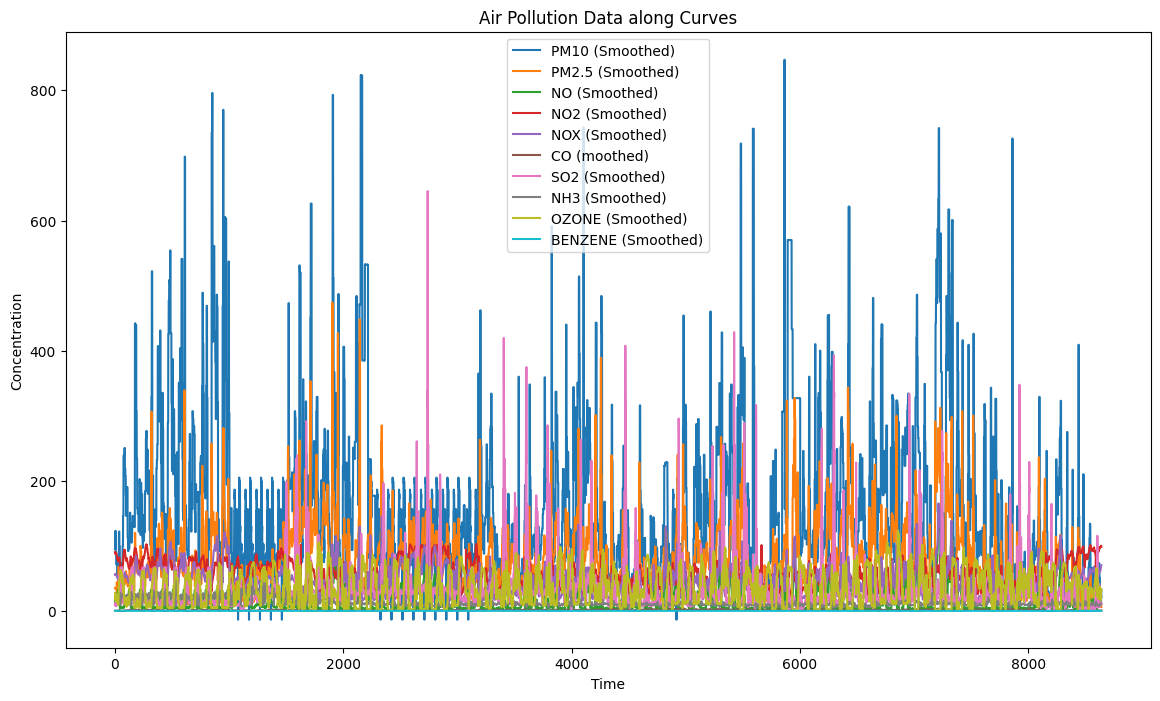

In [11]:
#Air Pollution data represented by smoothed curves
#getting concentration vs time graph
from scipy.interpolate import UnivariateSpline
from scipy.stats import norm
time = np.arange(len(data))
pm10 = data['PM10 (µg/m3)']
pm25 = data['PM2.5 (µg/m3)']
no = data['NO (µg/m3)']
no2 = data['NO2 (µg/m3)']
nox = data['NOX (ppb)']
co = data['CO (mg/m3)'] 
so2 = data['SO2 (µg/m3)']
nh3 = data['NH3 (µg/m3)']
ozone = data['Ozone (µg/m3)']
benzene = data['Benzene (µg/m3)']
smooth_pm10 = UnivariateSpline(time, pm10, s=100)
smooth_pm25 = UnivariateSpline(time, pm25, s=100)
smooth_no = UnivariateSpline(time, no, s=100)
smooth_no2 = UnivariateSpline(time, no2, s=100)
smooth_nox = UnivariateSpline(time, nox, s=100)
smooth_co = UnivariateSpline(time, co, s=100)
smooth_so2 = UnivariateSpline(time, so2, s=100)
smooth_nh3 = UnivariateSpline(time, nh3, s=100)
smooth_ozone = UnivariateSpline(time, ozone, s=100)
smooth_benzene = UnivariateSpline(time, benzene, s=100)
parametric_fit_pm10 = norm.fit(pm10)
parametric_fit_pm25 = norm.fit(pm25)
parametric_fit_no = norm.fit(no)
parametric_fit_no2 = norm.fit(no2)
parametric_fit_nox = norm.fit(nox)
parametric_fit_co = norm.fit(co)
parametric_fit_so2 = norm.fit(so2)
parametric_fit_nh3 = norm.fit(nh3)
parametric_fit_ozone = norm.fit(ozone)
parametric_fit_benzene = norm.fit(benzene)
plt.figure(figsize=(14, 8))
plt.plot(time, smooth_pm10(time), label='PM10 (Smoothed)')
plt.plot(time, smooth_pm25(time), label='PM2.5 (Smoothed)')
plt.plot(time, smooth_no(time), label='NO (Smoothed)')
plt.plot(time, smooth_no2(time), label='NO2 (Smoothed)')
plt.plot(time, smooth_nox(time), label='NOX (Smoothed)')
plt.plot(time, smooth_co(time), label='CO (moothed)')
plt.plot(time, smooth_so2(time), label='SO2 (Smoothed)')
plt.plot(time, smooth_nh3(time), label='NH3 (Smoothed)')
plt.plot(time, smooth_ozone(time), label='OZONE (Smoothed)')
plt.plot(time, smooth_benzene(time), label='BENZENE (Smoothed)')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Air Pollution Data along Curves')
plt.legend()
plt.show()

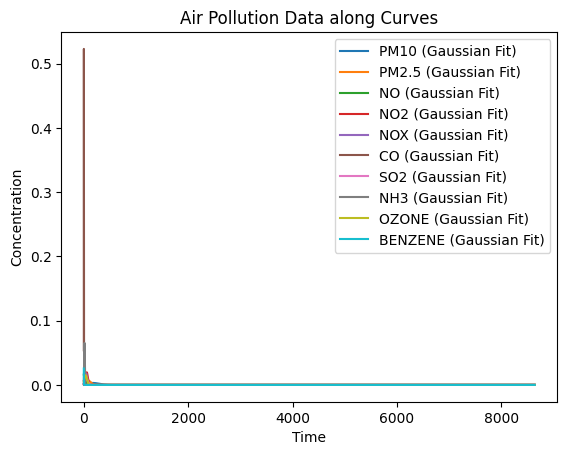

In [12]:
#Analyzing the curves using Gaussian fit method
plt.plot(time, norm.pdf(time, *parametric_fit_pm10), label='PM10 (Gaussian Fit)')
plt.plot(time, norm.pdf(time, *parametric_fit_pm25), label='PM2.5 (Gaussian Fit)')
plt.plot(time, norm.pdf(time, *parametric_fit_no), label='NO (Gaussian Fit)')
plt.plot(time, norm.pdf(time, *parametric_fit_no2), label='NO2 (Gaussian Fit)')
plt.plot(time, norm.pdf(time, *parametric_fit_nox), label='NOX (Gaussian Fit)')
plt.plot(time, norm.pdf(time, *parametric_fit_co), label='CO (Gaussian Fit)')
plt.plot(time, norm.pdf(time, *parametric_fit_so2), label='SO2 (Gaussian Fit)')
plt.plot(time, norm.pdf(time, *parametric_fit_nh3), label='NH3 (Gaussian Fit)')
plt.plot(time, norm.pdf(time, *parametric_fit_ozone), label='OZONE (Gaussian Fit)')
plt.plot(time, norm.pdf(time, *parametric_fit_benzene), label='BENZENE (Gaussian Fit)')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Air Pollution Data along Curves')
plt.legend()
plt.show()

# Performing descriptive analysis of the dataset

In [13]:
#Analyzing measure of frequency of all the columns of the dataset
data = pd.DataFrame(data)
blasting_period_start = '13:45:00'
blasting_period_end = '14:45:00'
data['Time'] = pd.to_datetime(data['Time'])
blasting_data = data[(data['Time'] >= blasting_period_start) & (data['Time'] <= blasting_period_end)]

pm10_frequency = blasting_data['PM10 (µg/m3)'].value_counts()

print(pm10_frequency)

PM10 (µg/m3)
43.042385     19
32.928895     19
60.705781     19
70.997488     19
68.691900     19
              ..
74.000000      1
99.000000      1
78.000000      1
166.000000     1
39.000000      1
Name: count, Length: 90, dtype: int64


In [14]:
pm2not5_frequency = blasting_data['PM2.5 (µg/m3)'].value_counts()
no_frequency = blasting_data['NO (µg/m3)'].value_counts()
no2_frequency = blasting_data['NO2 (µg/m3)'].value_counts()
nox_frequency = blasting_data['NOX (ppb)'].value_counts()
co_frequency = blasting_data['CO (mg/m3)'].value_counts()
so2_frequency = blasting_data['SO2 (µg/m3)'].value_counts()
nh3_frequency = blasting_data['NH3 (µg/m3)'].value_counts()
ozone_frequency = blasting_data['Ozone (µg/m3)'].value_counts()
benzene_frequency = blasting_data['Benzene (µg/m3)'].value_counts()
print(pm2not5_frequency)
print(no_frequency)
print(no2_frequency)
print(nox_frequency)
print(co_frequency)
print(so2_frequency)
print(nh3_frequency)
print(ozone_frequency)
print(benzene_frequency)

PM2.5 (µg/m3)
30.0    26
32.0    20
24.0    16
20.0    15
38.0    15
        ..
76.0     1
40.0     1
6.0      1
93.0     1
8.0      1
Name: count, Length: 64, dtype: int64
NO (µg/m3)
3.5     22
3.4     22
3.1     19
3.6     18
3.9     17
        ..
31.7     1
7.4      1
4.9      1
13.2     1
2.1      1
Name: count, Length: 96, dtype: int64
NO2 (µg/m3)
27.900000    5
28.000000    5
28.400000    4
33.300000    4
29.500000    4
            ..
86.800000    1
22.900000    1
24.500000    1
58.847335    1
82.500000    1
Name: count, Length: 309, dtype: int64
NOX (ppb)
17.8    9
18.1    9
17.2    8
17.0    8
17.7    8
       ..
49.0    1
48.4    1
82.2    1
83.0    1
47.5    1
Name: count, Length: 241, dtype: int64
CO (mg/m3)
1.06    10
0.24     9
0.94     8
0.86     8
1.08     7
        ..
2.32     1
1.50     1
1.43     1
1.42     1
0.11     1
Name: count, Length: 155, dtype: int64
SO2 (µg/m3)
49.421488    12
29.556898    12
53.211752    11
36.971376    11
27.448166    11
             ..
74.

In [15]:
#Analyzing measure of central tendency of the data values(mean and median)
measures_of_central_tendency = blasting_data.agg(['mean', 'median', lambda x: x.mode().values[0]])

measures_of_central_tendency.head()

,Unnamed: 0,PM10 (µg/m3),Time,Date,NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
mean,4329.0,97.693250,2023-07-28 14:15:00,2023-03-17 11:59:59.999999744,5.490348,34.181804,47.803924,29.993426,1.055087,51.798855,12.715081,66.428793,0.157137
median,4329.0,84.000000,2023-07-28 14:15:00,2023-03-17 12:00:00.000000000,3.900000,31.000000,42.150000,25.950000,0.965000,30.300000,10.100000,67.850000,0.177505
<lambda>,55.0,32.928895,2023-07-28 13:45:00,2023-02-01 00:00:00.000000000,3.400000,30.000000,27.900000,17.800000,1.060000,29.556898,10.800000,74.400000,0.177505


In [16]:
#Analyzing measure of dispersion of the data values(standard deviation and variance)
blasting_period_start = '13:45:00'
blasting_period_end = '14:45:00'
data['Time'] = pd.to_datetime(data['Time'])
blasting_data = data[(data['Time'] >= blasting_period_start) & (data['Time'] <= blasting_period_end)]
measures_of_dispersion = blasting_data.drop(columns=['Time', 'Date']).agg(['std', 'var'])

measures_of_dispersion.head()

,Unnamed: 0,PM10 (µg/m3),NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
std,2.496775e+03,73.507027,7.259741,18.551560,20.433826,14.951182,0.542093,59.394849,7.076697,16.337413,0.034589
var,6.233887e+06,5403.282977,52.703840,344.160386,417.541243,223.537845,0.293865,3527.748099,50.079640,266.911050,0.001196


In [36]:
#Analyzing method of position of datavalues
blasting_period_start = '13:45:00'
blasting_period_end = '14:45:00'
data['Time'] = pd.to_datetime(data['Time'])
blasting_data = data[(data['Time'] >= blasting_period_start) & (data['Time'] <= blasting_period_end)]
measures_of_position = blasting_data.drop(columns=['Time', 'Date']).describe(percentiles=[0.25, 0.5, 0.75])
measures_of_position.head()

,Unnamed: 0,PM10 (µg/m3),NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,4329.000000,97.693250,5.490348,34.181804,47.803924,29.993426,1.055087,51.798855,12.715081,66.428793,0.157137
std,2496.775337,73.507027,7.259741,18.551560,20.433826,14.951182,0.542093,59.394849,7.076697,16.337413,0.034589
min,55.000000,15.000000,0.200000,4.000000,12.700000,9.700000,0.110000,0.500000,5.100000,8.100000,0.100000
25%,2169.250000,58.250000,3.300000,21.000000,29.500000,18.225000,0.660000,17.750000,8.700000,60.125000,0.100000


In [38]:
#Getting min and max value in the dataset
min_value=data.min()
max_value=data.max()
min_value.head()

Unnamed: 0                        0
PM10 (µg/m3)             -13.488183
Time            2023-07-28 00:00:00
Date            2023-02-01 00:00:00
NO (µg/m3)                      0.1
dtype: object

In [39]:
max_value.head()

Unnamed: 0                     8639
PM10 (µg/m3)                  847.0
Time            2023-07-28 23:45:00
Date            2023-05-01 00:00:00
NO (µg/m3)                    157.5
dtype: object

In [40]:
#Displaying correlations of datasets(how datavalues are related to each other)
data.corr()

,Unnamed: 0,PM10 (µg/m3),Time,Date,NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
Unnamed: 0,1.000000,-0.094031,1.111051e-02,9.999383e-01,-0.037397,-0.047939,-0.193832,-0.190961,0.271792,-0.049947,-0.612323,0.118347,-0.210463
PM10 (µg/m3),-0.094031,1.000000,-6.607595e-02,-9.330215e-02,0.338057,0.519071,0.111211,0.376677,0.237630,-0.066691,0.126787,-0.272115,0.333491
Time,0.011111,-0.066076,1.000000e+00,7.693855e-11,-0.324030,-0.178835,-0.040733,-0.244844,-0.153282,0.068096,-0.052704,0.314972,-0.158036
Date,0.999938,-0.093302,7.693855e-11,1.000000e+00,-0.033799,-0.045955,-0.193391,-0.188253,0.273512,-0.050706,-0.611775,0.114854,-0.208720
NO (µg/m3),-0.037397,0.338057,-3.240300e-01,-3.379860e-02,1.000000,0.589850,0.293774,0.810308,0.339828,0.013893,0.010689,-0.535566,0.155600
PM2.5 (µg/m3),-0.047939,0.519071,-1.788350e-01,-4.595530e-02,0.589850,1.000000,0.184725,0.528303,0.413555,-0.037140,0.049492,-0.498535,0.367714
NO2 (µg/m3),-0.193832,0.111211,-4.073343e-02,-1.933914e-01,0.293774,0.184725,1.000000,0.721059,-0.075715,0.166727,0.239725,-0.427005,0.018227
NOX (ppb),-0.190961,0.376677,-2.448438e-01,-1.882527e-01,0.810308,0.528303,0.721059,1.000000,0.204010,0.066211,0.222983,-0.613768,0.240162
CO (mg/m3),0.271792,0.237630,-1.532823e-01,2.735121e-01,0.339828,0.413555,-0.075715,0.204010,1.000000,-0.045896,-0.215052,-0.374947,0.178914
SO2 (µg/m3),-0.049947,-0.066691,6.809631e-02,-5.070630e-02,0.013893,-0.037140,0.166727,0.066211,-0.045896,1.000000,-0.081585,0.070972,-0.029167


# Forecasting Future Data Using Various Models

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

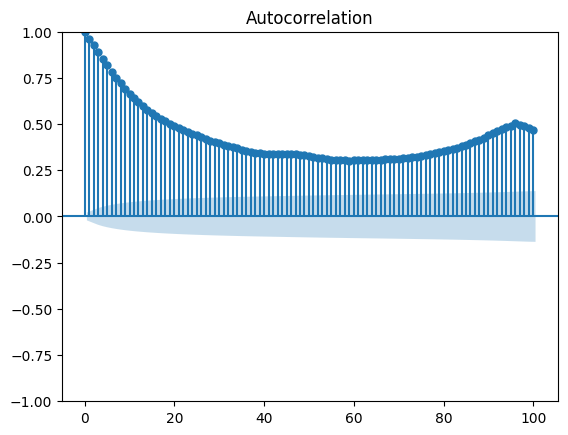

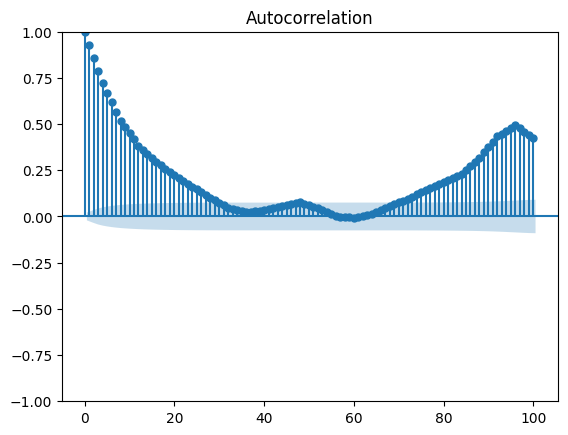

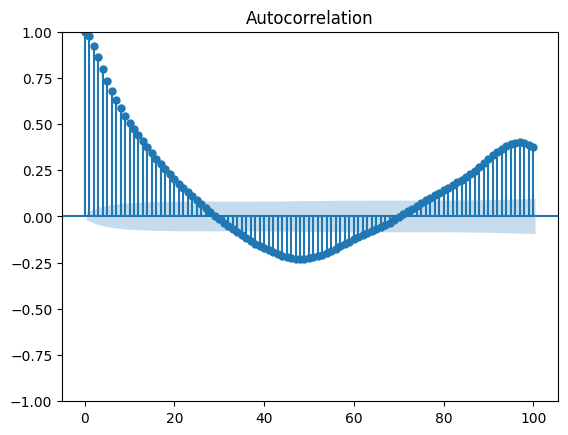

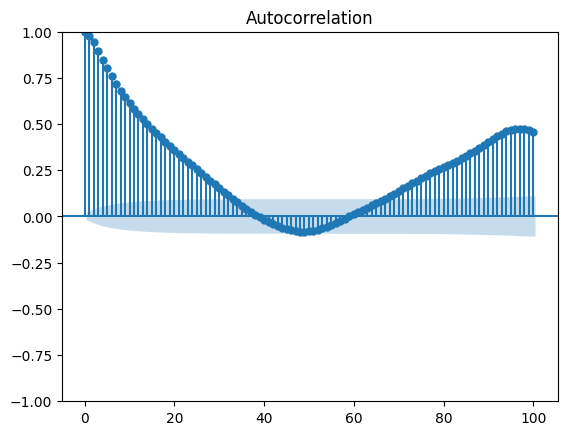

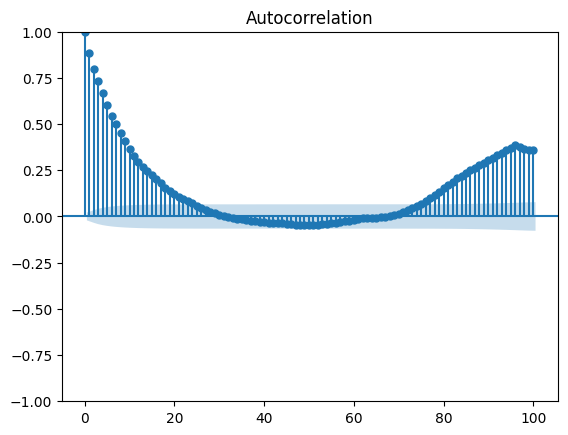

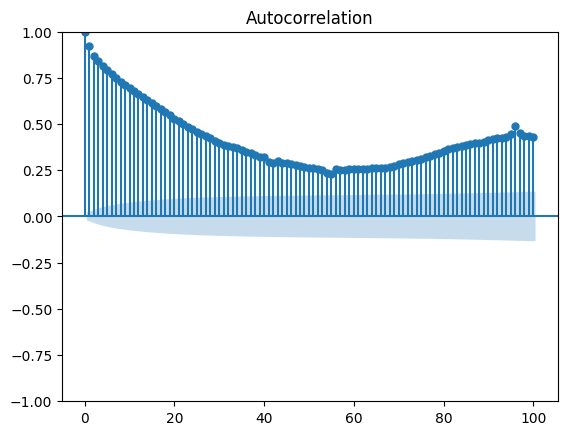

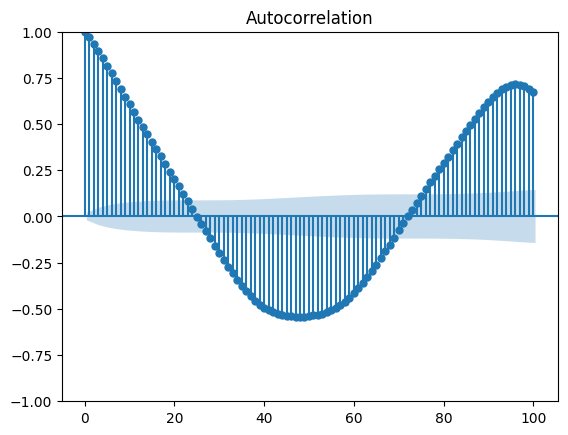

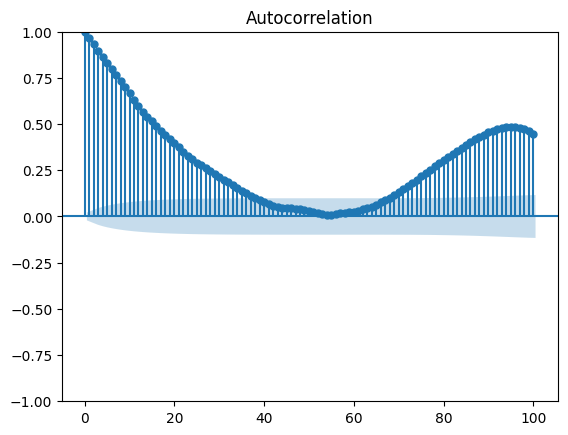

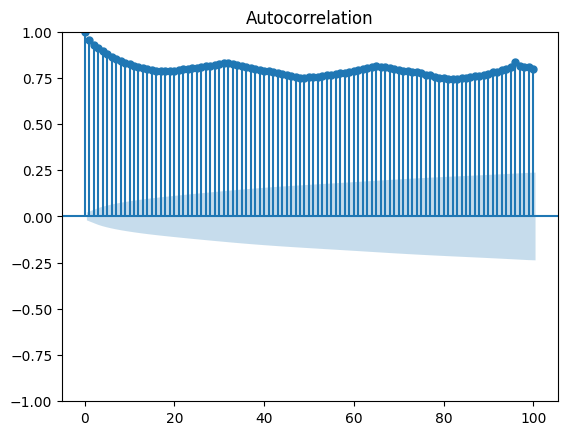

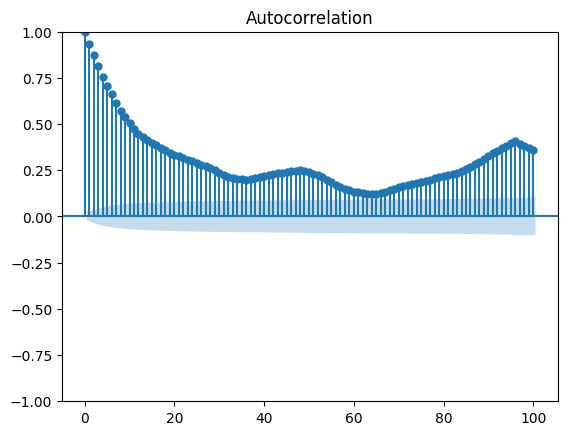

In [33]:
#Displaying Autocorrelation models of all the columns of the dataset
acf_plot= plot_acf(data['NO2 (µg/m3)'],lags=100)
acf_plot= plot_acf(data['PM2.5 (µg/m3)'],lags=100)
acf_plot= plot_acf(data['NO (µg/m3)'],lags=100)
acf_plot= plot_acf(data['NOX (ppb)'],lags=100)
acf_plot= plot_acf(data['SO2 (µg/m3)'],lags=100)
acf_plot= plot_acf(data['CO (mg/m3)'],lags=100)
acf_plot= plot_acf(data['Ozone (µg/m3)'],lags=100)
acf_plot= plot_acf(data['Benzene (µg/m3)'],lags=100)
acf_plot= plot_acf(data['NH3 (µg/m3)'],lags=100)
acf_plot= plot_acf(data['PM10 (µg/m3)'],lags=100)

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf

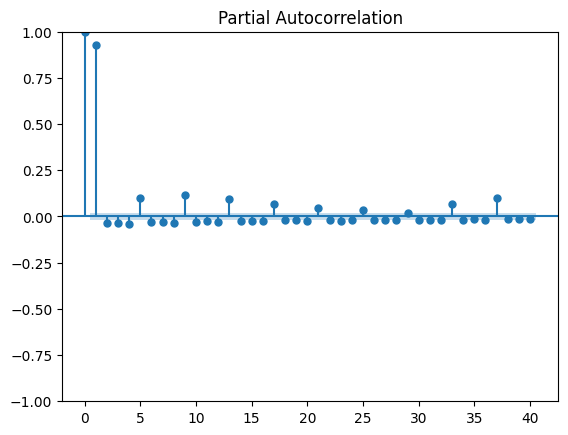

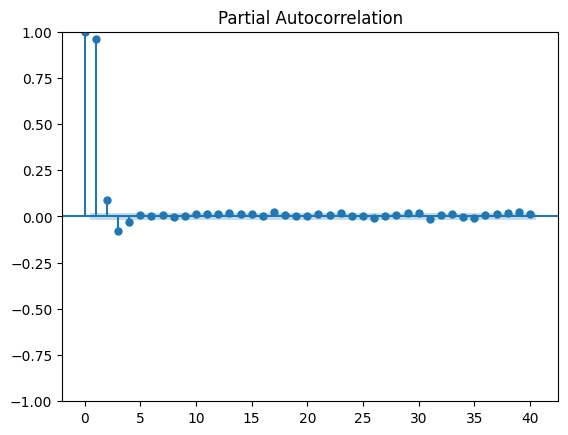

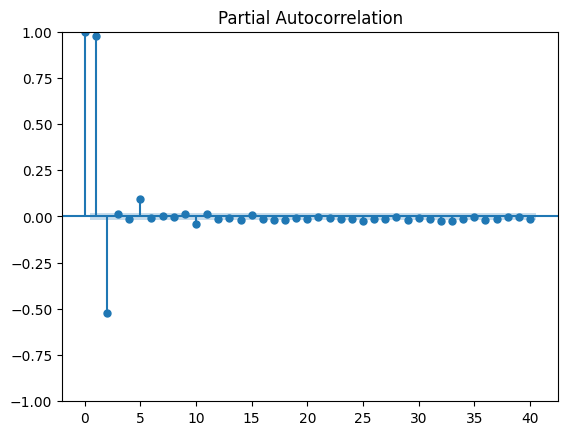

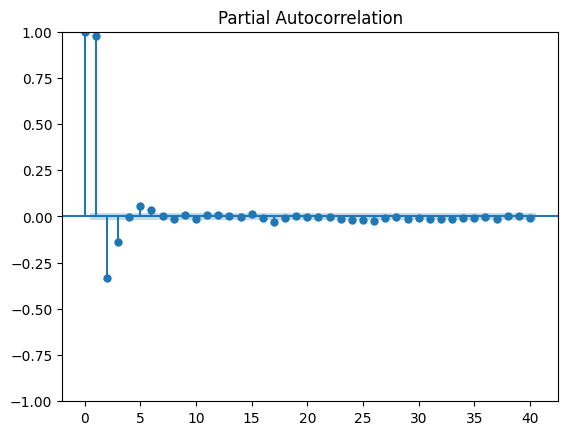

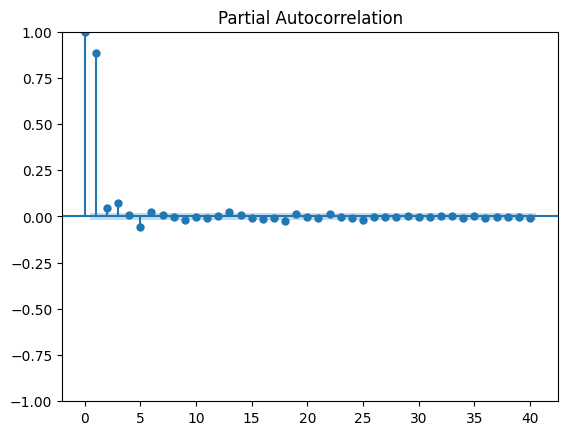

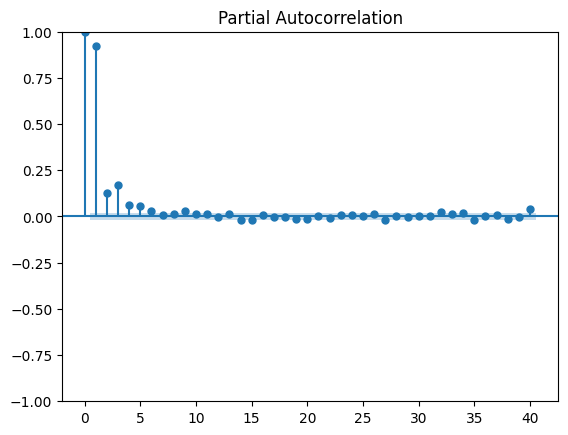

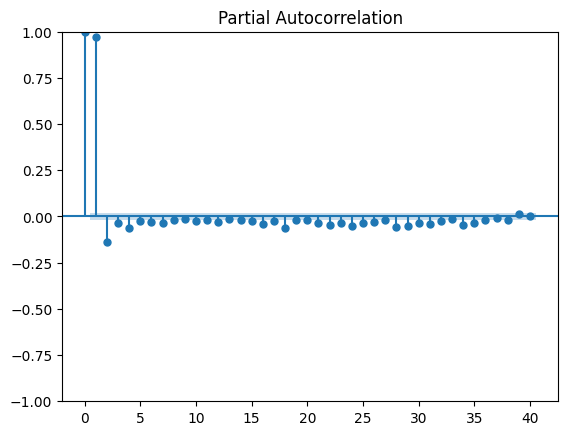

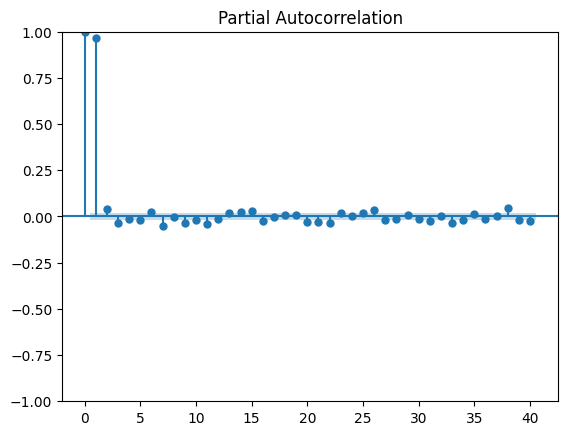

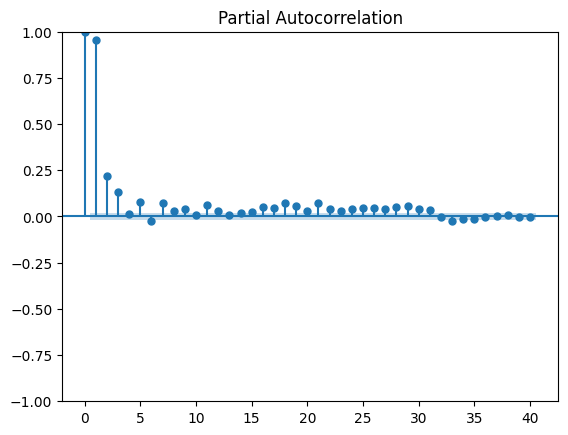

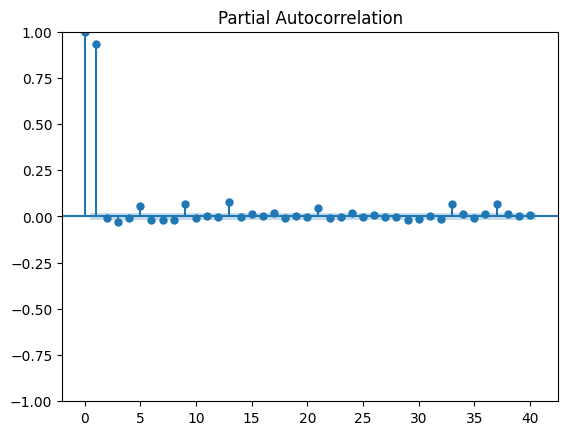

In [36]:
#Displaying Partial Autocorrelation models of all the columns of the dataset
pacf_plot=plot_pacf(data['PM2.5 (µg/m3)'])
pacf_plot=plot_pacf(data['NO2 (µg/m3)'])
pacf_plot=plot_pacf(data['NO (µg/m3)'])
pacf_plot=plot_pacf(data['NOX (ppb)'])
pacf_plot=plot_pacf(data['SO2 (µg/m3)'])
pacf_plot=plot_pacf(data['CO (mg/m3)'])
pacf_plot=plot_pacf(data['Ozone (µg/m3)'])
pacf_plot=plot_pacf(data['Benzene (µg/m3)'])
pacf_plot=plot_pacf(data['NH3 (µg/m3)'])
pacf_plot=plot_pacf(data['PM10 (µg/m3)'])

# Intervention Analysis of dataset

Intervention Analysis for Unnamed: 0:


C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

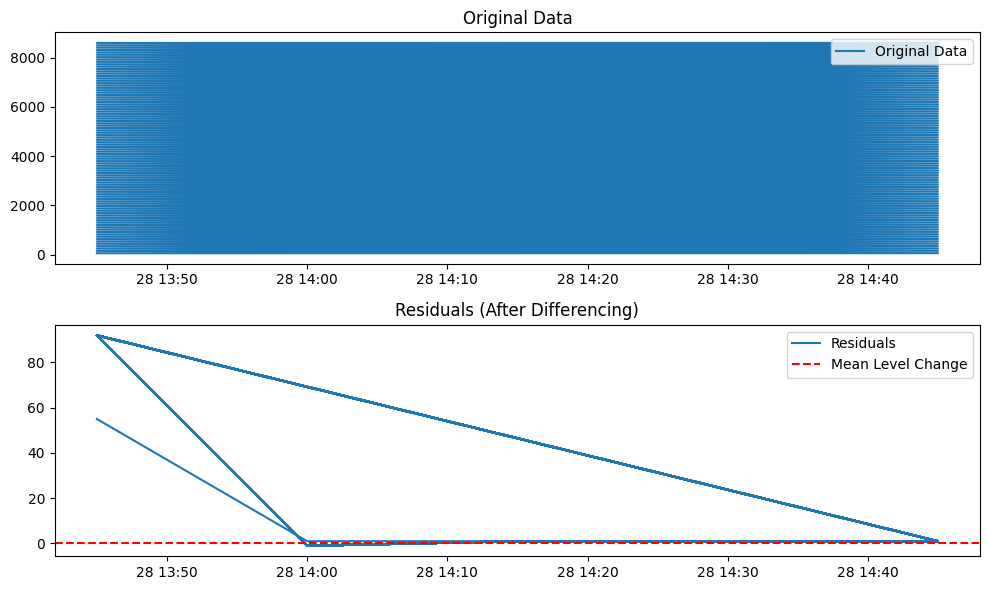

Mean Level Change: 18.700081411311796


Intervention Analysis for PM10 (µg/m3):


C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

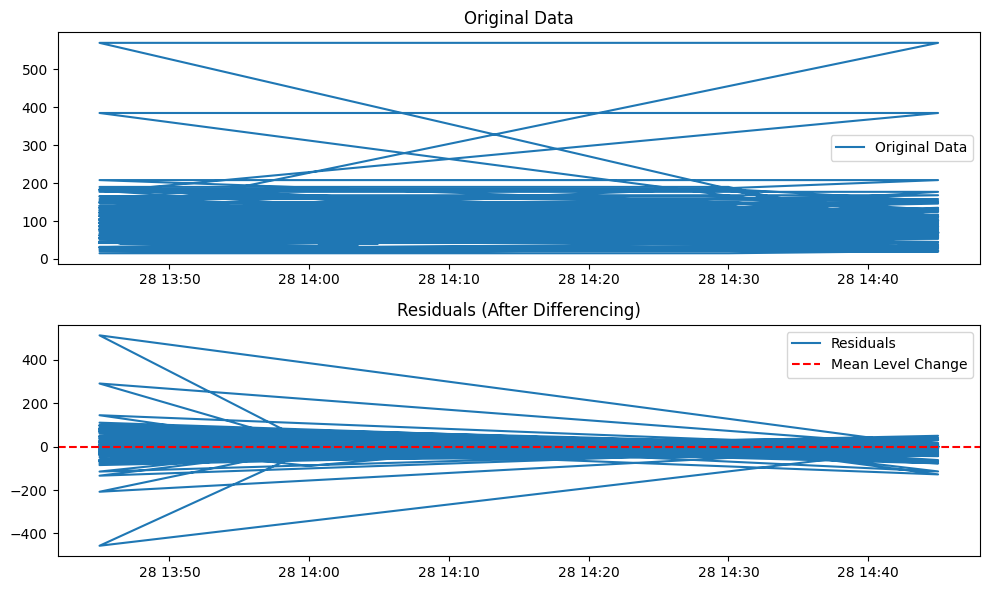

Mean Level Change: 0.042285598357452096


Intervention Analysis for NO (µg/m3):


C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

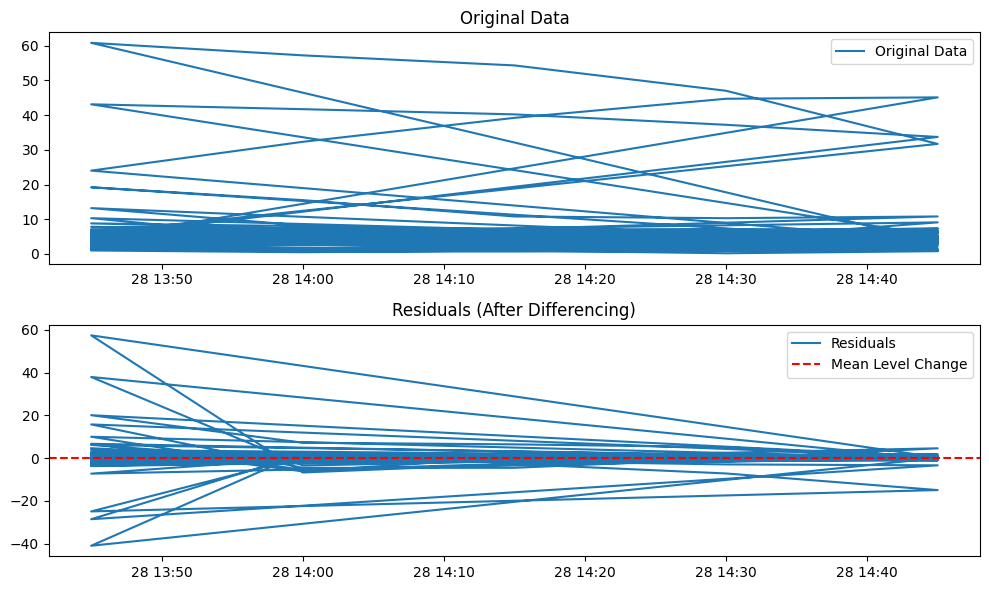

Mean Level Change: 0.009398742689324958


Intervention Analysis for PM2.5 (µg/m3):


C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

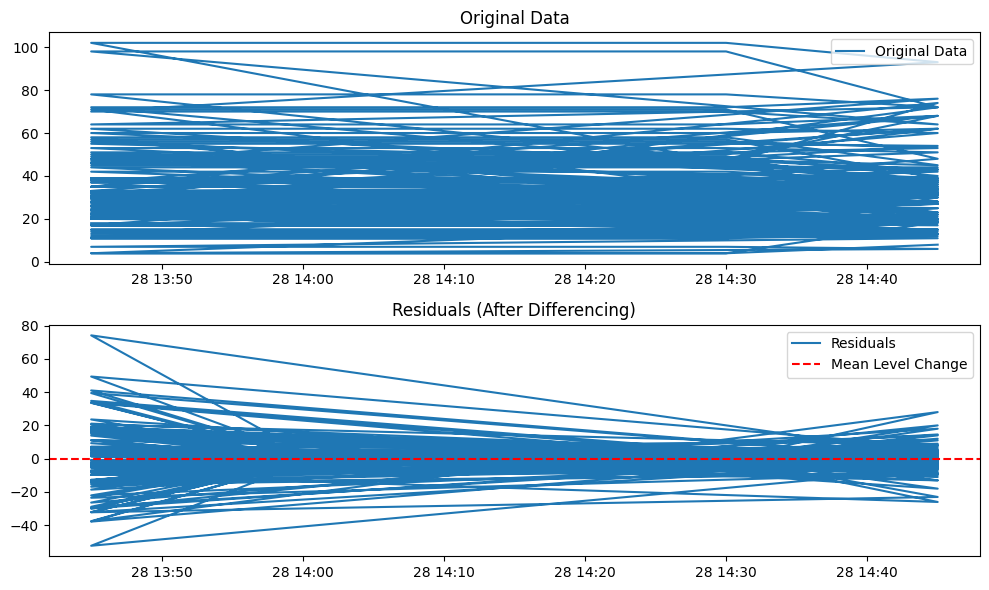

Mean Level Change: 0.01616061879198267


Intervention Analysis for NO2 (µg/m3):


C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

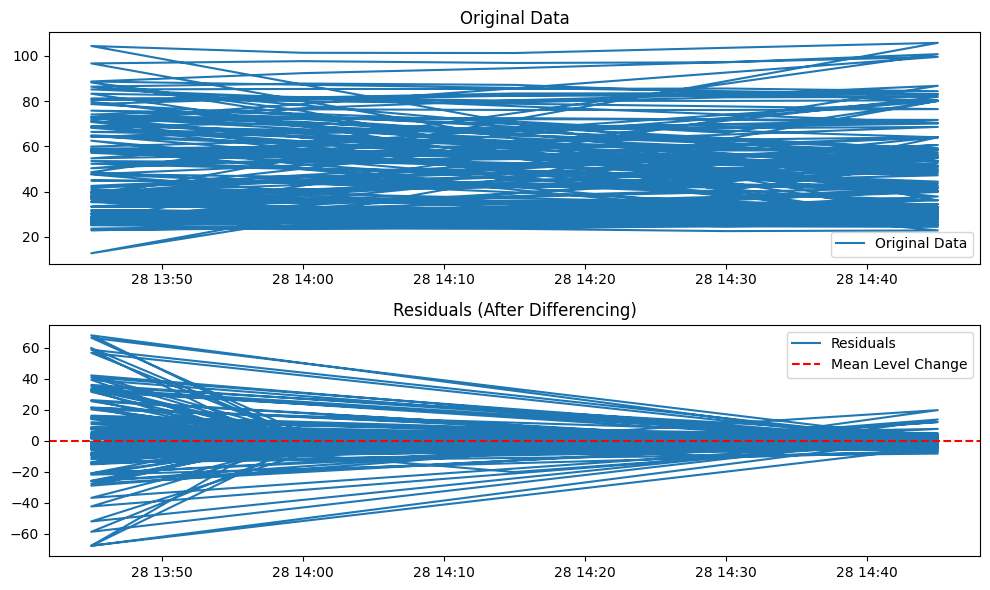

Mean Level Change: 0.18765558537579297


Intervention Analysis for NOX (ppb):


C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

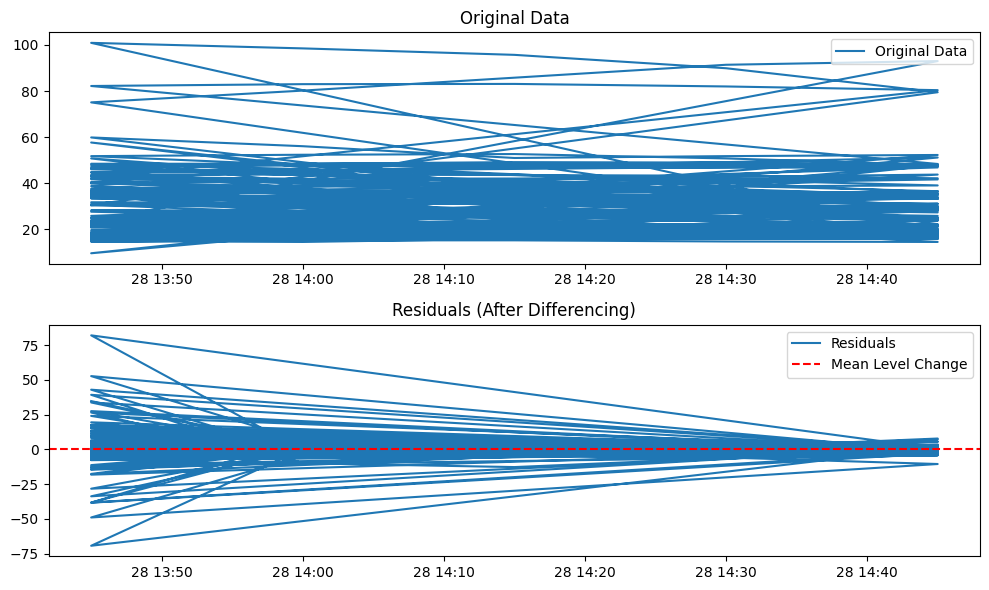

Mean Level Change: 0.10611782545446231


Intervention Analysis for CO (mg/m3):


C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

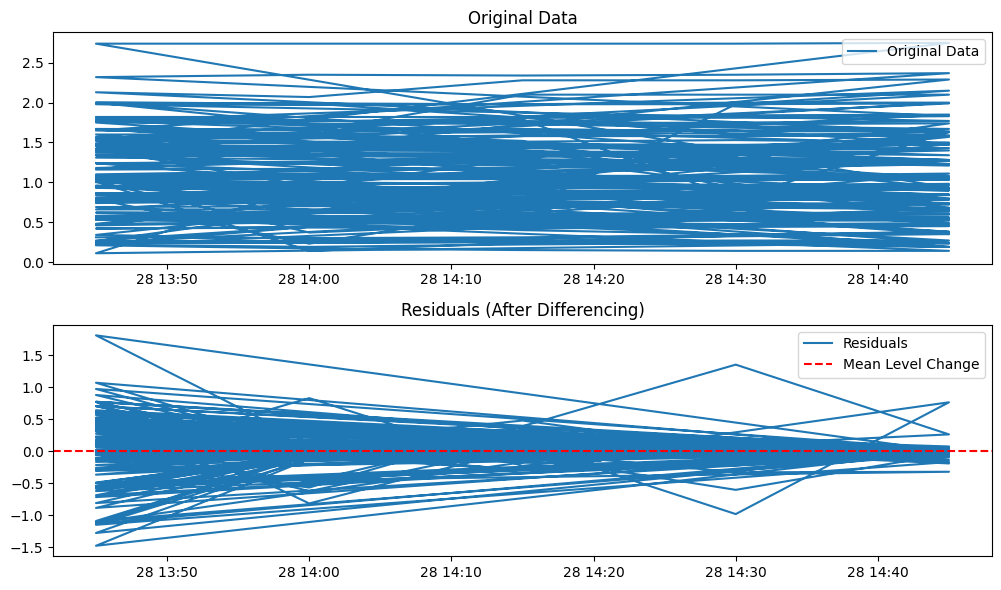

Mean Level Change: 0.001373272154778769


Intervention Analysis for SO2 (µg/m3):


C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

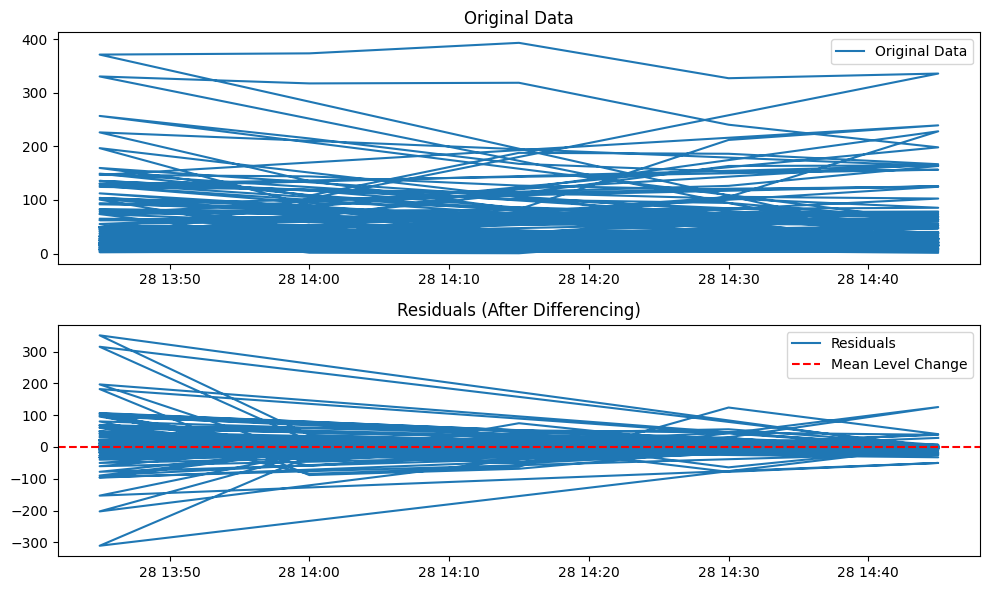

Mean Level Change: 0.0750068425405274


Intervention Analysis for NH3 (µg/m3):


C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

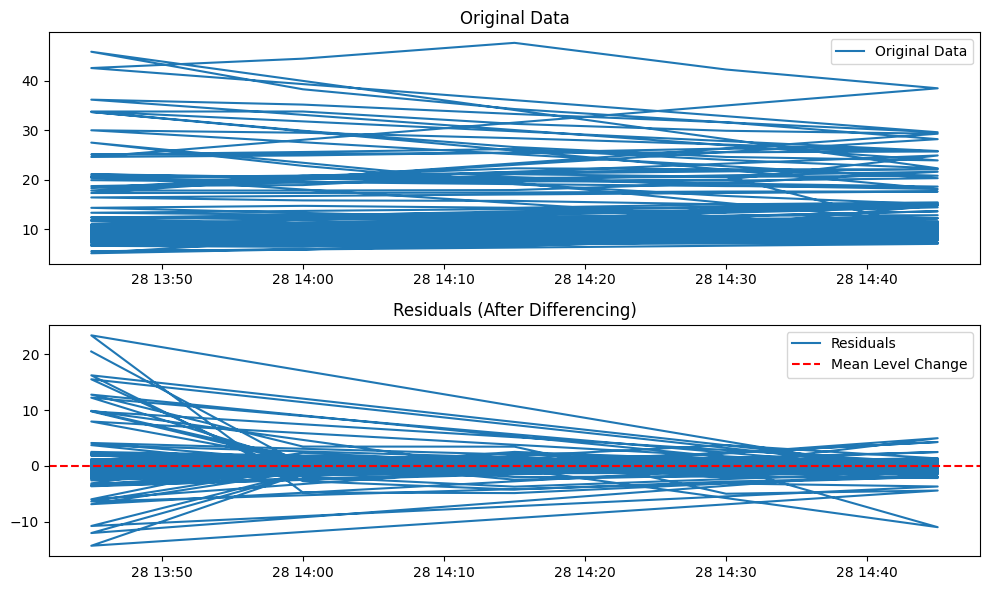

Mean Level Change: 0.0180084961986125


Intervention Analysis for Ozone (µg/m3):


C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

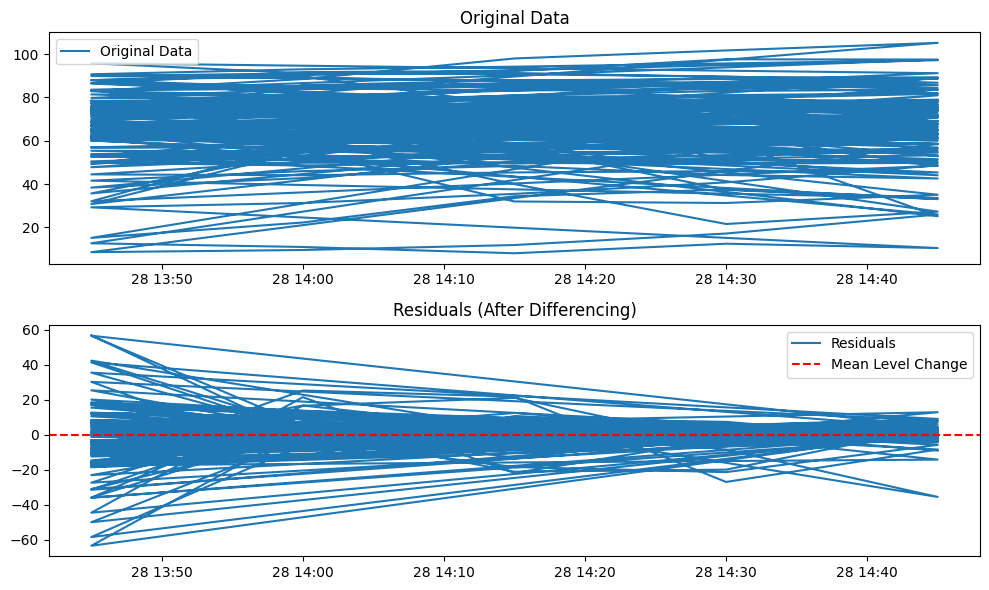

Mean Level Change: 0.1183074962824585


Intervention Analysis for Benzene (µg/m3):


C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2477s\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

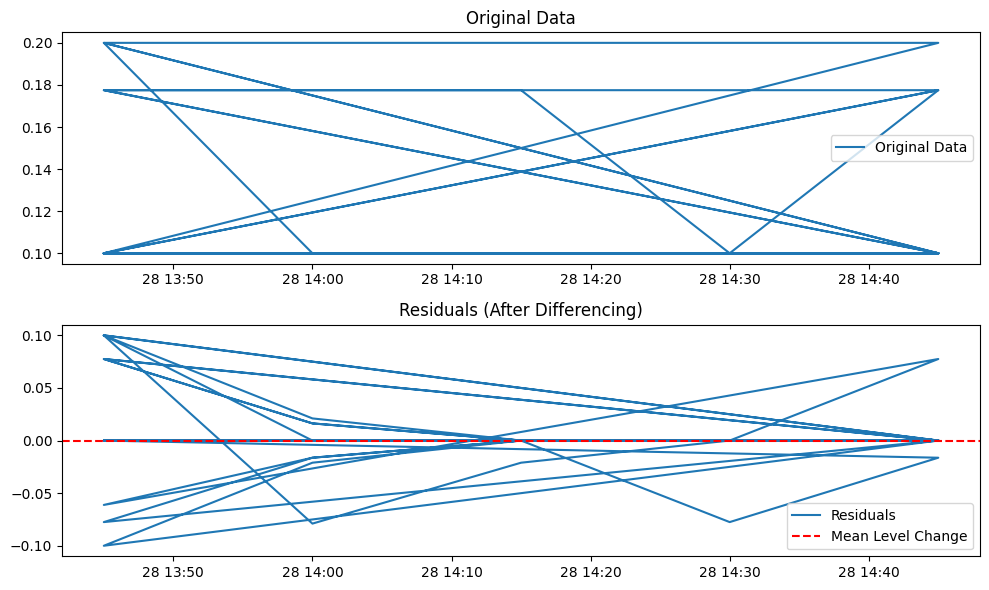

Mean Level Change: 0.00022222222223013832




In [39]:
#Analysis of how the mean level of a series changes after an intervention 
from statsmodels.tsa.arima.model import ARIMA                                      
blasting_period_start = '13:45:00'
blasting_period_end = '14:45:00'
data['Time'] = pd.to_datetime(data['Time'])
blasting_data = data[(data['Time'] >= blasting_period_start) & (data['Time'] <= blasting_period_end)]

blasting_data.set_index('Time', inplace=True)

def intervention_analysis(data):

    model = ARIMA(data, order=(1, 1, 0))
    model_fit = model.fit()
    residuals = model_fit.resid
    mean_level_change = np.mean(residuals)

    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(data, label='Original Data')
    plt.title('Original Data')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(residuals, label='Residuals')
    plt.axhline(0, color='red', linestyle='--', label='Mean Level Change')
    plt.title('Residuals (After Differencing)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"Mean Level Change: {mean_level_change}")
for column in blasting_data.columns:
    if column != 'Date':
        print(f"Intervention Analysis for {column}:")
        intervention_analysis(blasting_data[column])
        print('\n')

# Segmentation of dataset

In [37]:
#Splitting the data into segments before and after the time of blasting to show the underlying properties
blasting_period_start = '13:45:00'
blasting_period_end = '14:45:00'
data['Time'] = pd.to_datetime(data['Time'])

blasting_time_index = data[data['Time'] == blasting_period_start].index[0]

before_blasting = data.iloc[:blasting_time_index + 1]
after_blasting = data.iloc[blasting_time_index:]

print("Segment Before Blasting:")
print(before_blasting)

print("\nSegment After Blasting:")
print(after_blasting)

Segment Before Blasting:
    Unnamed: 0  PM10 (µg/m3)                Time       Date  NO (µg/m3)   
0            0          95.0 2023-07-28 00:00:00 2023-02-01   14.484070  \
1            1          95.0 2023-07-28 00:15:00 2023-02-01   14.484070   
2            2          95.0 2023-07-28 00:30:00 2023-02-01   15.835914   
3            3         122.0 2023-07-28 00:45:00 2023-02-01   15.914518   
4            4         122.0 2023-07-28 01:00:00 2023-02-01   16.035640   
5            5         122.0 2023-07-28 01:15:00 2023-02-01   17.497777   
6            6         122.0 2023-07-28 01:30:00 2023-02-01   17.121285   
7            7          90.0 2023-07-28 01:45:00 2023-02-01   15.532830   
8            8          90.0 2023-07-28 02:00:00 2023-02-01   19.465702   
9            9          90.0 2023-07-28 02:15:00 2023-02-01   22.215146   
10          10          90.0 2023-07-28 02:30:00 2023-02-01   21.873791   
11          11          72.0 2023-07-28 02:45:00 2023-02-01   22.263463   
